In [39]:
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
import time

In [2]:
dt = pd.read_csv("sudoku_dataset/sudoku.csv")
print(dt.shape)

(1000000, 2)


In [3]:
def create_dataframe(string):
    array = list(string)
    reshaped = np.reshape(array, (9,9))
    return pd.DataFrame(reshaped)

In [4]:
puz = create_dataframe(dt["quizzes"][0])
sol = create_dataframe(dt["solutions"][0])
print("quiz")
display(puz)
print("solution")
display(sol)

quiz


,0,1,2,3,4,5,6,7,8
0,0,0,4,3,0,0,2,0,9
1,0,0,5,0,0,9,0,0,1
2,0,7,0,0,6,0,0,4,3
3,0,0,6,0,0,2,0,8,7
4,1,9,0,0,0,7,4,0,0
5,0,5,0,0,8,3,0,0,0
6,6,0,0,0,0,0,1,0,5
7,0,0,3,5,0,8,6,9,0
8,0,4,2,9,1,0,3,0,0


solution


,0,1,2,3,4,5,6,7,8
0,8,6,4,3,7,1,2,5,9
1,3,2,5,8,4,9,7,6,1
2,9,7,1,2,6,5,8,4,3
3,4,3,6,1,9,2,5,8,7
4,1,9,8,6,5,7,4,3,2
5,2,5,7,4,8,3,9,1,6
6,6,8,9,7,3,4,1,2,5
7,7,1,3,5,2,8,6,9,4
8,5,4,2,9,1,6,3,7,8


In [5]:
from keras.utils import to_categorical

def preprocessing_data(data):
    array = [list(map(int,list(i))) for i in data]
    return to_categorical(array, num_classes=10)

In [74]:
epochs = 40
batch = 32
train_size = 10000
test_size = 10000

In [75]:
x_train = preprocessing_data(dt["quizzes"][:train_size])
y_train = preprocessing_data(dt["solutions"][:train_size])

x_test = preprocessing_data(dt["quizzes"][train_size:train_size+test_size])
y_test = preprocessing_data(dt["solutions"][train_size:train_size+test_size])

print(y_train.shape)
# print(y_train)

(10000, 81, 10)


In [76]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Reshape, Dropout, BatchNormalization

model = Sequential()
model.add(Flatten(input_shape=x_train.shape[1:]))
model.add(Dense(units=810, activation='softmax'))
model.add(Reshape((81,10)))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

tbCallBack = keras.callbacks.TensorBoard(log_dir='./logs/{}'.format(int(time.time())), histogram_freq=0, write_graph=True, write_images=True)

history = model.fit(x_train, y_train, validation_split=0.50, epochs=epochs, batch_size=batch, callbacks=[tbCallBack])

score = model.evaluate(x_test, y_test, batch_size=batch)
print(score)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_14 (Flatten)         (None, 810)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 810)               656910    
_________________________________________________________________
reshape_18 (Reshape)         (None, 81, 10)            0         
Total params: 656,910
Trainable params: 656,910
Non-trainable params: 0
_________________________________________________________________
Train on 5000 samples, validate on 5000 samples
Epoch 1/40
5000/5000 [==============================] - 2s 486us/step - loss: 2.1290 - acc: 0.2112 - val_loss: 2.0156 - val_acc: 0.3141
Epoch 2/40
5000/5000 [==============================] - 2s 467us/step - loss: 1.8386 - acc: 0.5140 - val_loss: 1.8302 - val_acc: 0.4863
Epoch 3/40
5000/5000 [==============================] - 2s 471us/step - loss: 1.

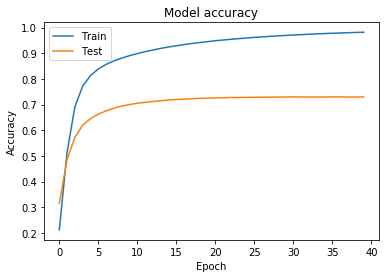

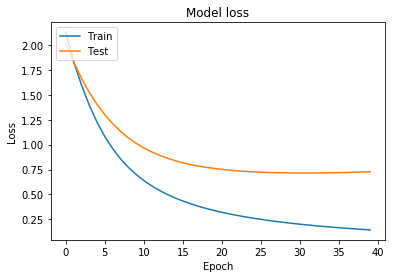

In [77]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [78]:
x = [np.argmax(i) for i in x_test[0]]
y = [np.argmax(i) for i in y_test[0]]

p = model.predict(x_test[0].reshape(1,81,10))
p = p.reshape((81,10))
p = [np.argmax(i) for i in p]

puz = create_dataframe(x)
sol = create_dataframe(y)
pre = create_dataframe(p)

print("quiz")
display(puz)
print("solution")
display(sol)
print("predicted")
display(pre)

quiz


,0,1,2,3,4,5,6,7,8
0,6,0,9,5,0,1,0,2,0
1,0,1,5,0,0,0,0,7,0
2,8,4,0,0,3,0,0,0,0
3,0,2,0,3,0,0,0,0,0
4,7,0,4,0,0,6,5,9,0
5,9,6,8,2,7,0,4,0,0
6,0,0,0,0,0,8,0,1,9
7,2,0,0,0,0,0,0,4,7
8,1,0,0,6,9,0,0,0,3


solution


,0,1,2,3,4,5,6,7,8
0,6,7,9,5,8,1,3,2,4
1,3,1,5,4,6,2,9,7,8
2,8,4,2,9,3,7,1,6,5
3,5,2,1,3,4,9,7,8,6
4,7,3,4,8,1,6,5,9,2
5,9,6,8,2,7,5,4,3,1
6,4,5,3,7,2,8,6,1,9
7,2,9,6,1,5,3,8,4,7
8,1,8,7,6,9,4,2,5,3


predicted


,0,1,2,3,4,5,6,7,8
0,6,7,9,5,4,1,7,2,4
1,3,1,5,9,2,2,8,7,4
2,8,4,2,7,3,9,6,5,1
3,5,2,1,3,5,9,7,8,7
4,7,1,4,8,8,6,5,9,8
5,9,6,8,2,7,5,4,3,1
6,3,5,7,1,5,8,9,1,9
7,2,9,6,1,1,3,8,4,7
8,1,8,7,6,9,4,2,8,3
